# Logistic Regression


### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline

###  Load the Dataset

##### El set de datos proviene de aquí: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

**RowNumber**: The sequential number assigned to each row in the dataset.  
**CustomerId**: A unique identifier for each customer.  
**Surname**: The surname of the customer.  
**CreditScore**: The credit score of the customer.  
**Geography**: The geographical location of the customer (e.g., country or region).  
**Gender**: The gender of the customer.  
**Age**: The age of the customer.  
**Tenure**: The number of years the customer has been with the bank.  
**Balance**: The account balance of the customer.  
**NumOfProducts**: The number of bank products the customer has.  
**HasCrCard**: Indicates whether the customer has a credit card (binary: yes/no).  
**IsActiveMember**: Indicates whether the customer is an active member (binary: yes/no).  
**EstimatedSalary**: The estimated salary of the customer.  
**Exited**: Indicates whether the customer has exited the bank (binary: yes/no).  

In [37]:
os.getcwd()

'C:\\Users\\tomas\\ML\\logistic regression'

In [2]:
file='Churn_Modelling.csv'
df = pd.read_csv(file, delimiter=',', low_memory=False)
df.shape
#os.getcwd()
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

**Check the head of df**

In [3]:
# Get the first five rows of DataFrame ad_data.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

**Use info and describe() on df**

In [42]:
# Get a concise summary of DataFrame ad_data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Get the statistical summary of the DataFrame ad_data.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's check for any null values.

In [6]:
# The isnull() method is used to check and manage NULL values in a data frame.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis (EDA)


**Create a histogram of the Age**

Text(0.5, 0, 'Age')

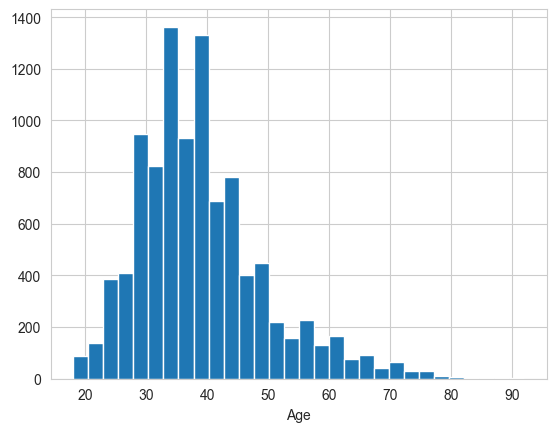

In [7]:
# Seaborn is a Python data visualization library based on matplotlib.
# Set the aesthetic style of the plots.
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

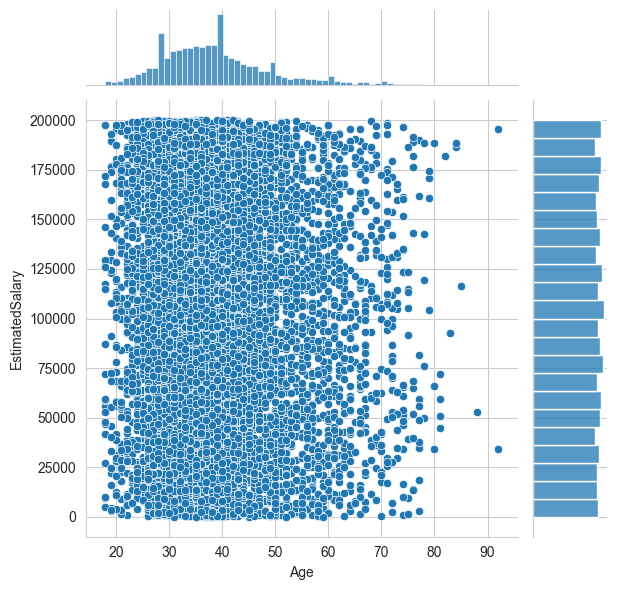

In [8]:
# TODO 1
# Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as
# 1D profiles (univariate) in the margins.
sns.jointplot(x='Age',y='EstimatedSalary',data=df)

 **Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

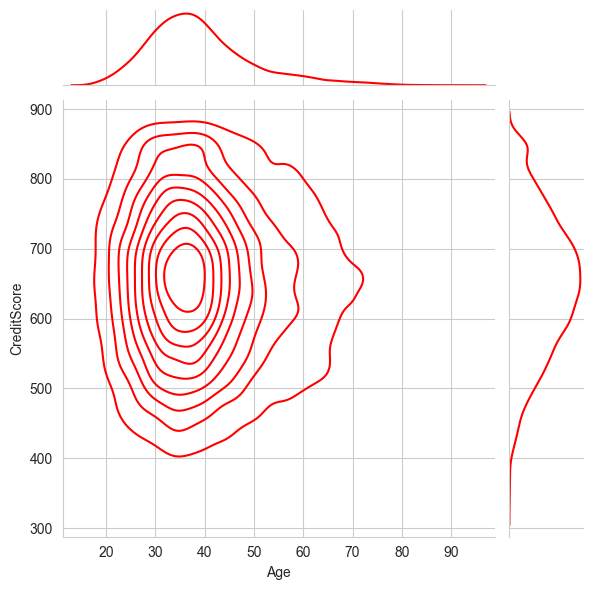

In [9]:
sns.jointplot(x='Age',y='CreditScore',data=df,color='red',kind='kde');

 **Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

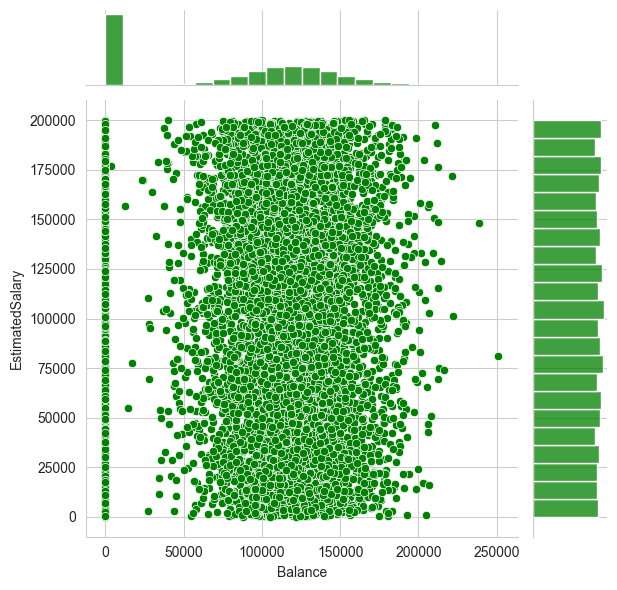

In [47]:
sns.jointplot(x='Balance',y='EstimatedSalary',data=df,color='green')

**Transformamos las variables categoricas en dummies**

In [10]:
df_original = df

**Eliminamos el apellido**  
Tiene pinta de que va a ser una variable dispersa y no va a aportar al modelo

In [11]:
frecuencias = df['Surname'].value_counts()
frecuencias

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [58]:
df.shape

(10000, 14)

In [12]:
df = df.drop(columns='Surname')

In [60]:
df.shape

(10000, 13)

In [13]:
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols
    
vbles = tipo_variables(df)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)

['Geography', 'Gender']
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [14]:
from sklearn.preprocessing import OneHotEncoder
# Crear un objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
#El parámetro sparse_output=False asegura que la salida sea un array denso 
#(en lugar de una matriz dispersa), lo cual es más fácil de convertir en un DataFrame de pandas.
for i in cat_vbles:
    encoded_data = encoder.fit_transform(df[[i]])
    column_names = encoder.get_feature_names_out([i])
    encoded_df=pd.DataFrame(encoded_data, columns=column_names)
    df = pd.concat([df, encoded_df], axis=1)

df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


**Eliminamos las variables categoricas una vez las hemos convertido en dummies**  

In [15]:
df = df.drop(columns=cat_vbles)

<Axes: >

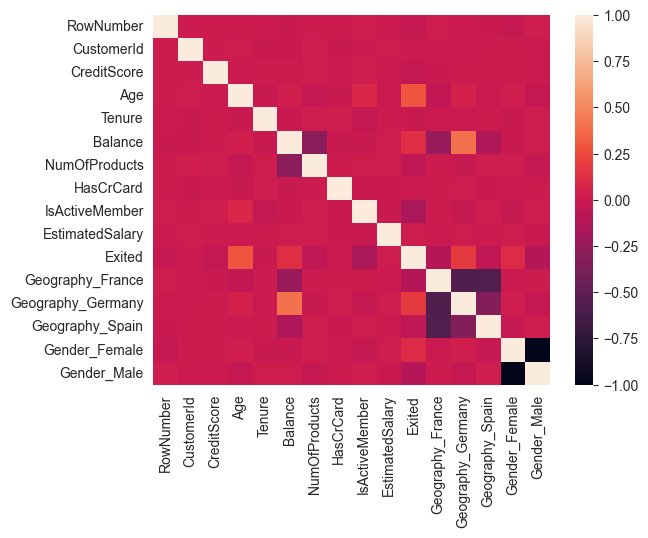

In [69]:
sns.heatmap(df.corr())

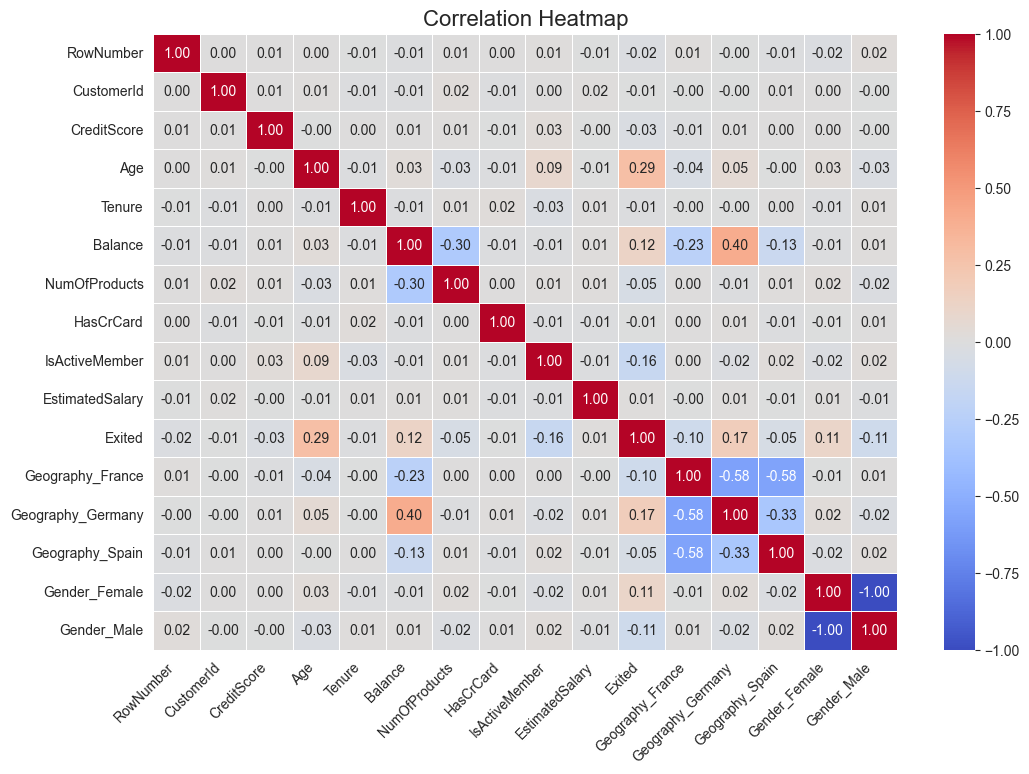

In [17]:
plt.figure(figsize=(12, 8)) # Set the figure size


sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16) # Add a title

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.yticks(rotation=0) # Keep y-axis labels horizontal

plt.show()

# Logistic Regression

Logistic regression is a supervised machine learning process.  It is similar to linear regression, but rather than predict a continuous value, you try to  estimate probabilities by using a logistic function.  Note that even though it has regression in the name, it is for classification.
<!-- While linear regression is acceptable for estimating values, logistic regression is best for predicting the class of an observation -->

In [18]:
# `train_test_split` is a function in Sklearn model selection for splitting data arrays into two subsets:
# for training data and for testing data.
# With this function, you don't need to divide the dataset manually.
# By default, Sklearn `train_test_split` will make random partitions for the two subsets.
# However, you can also specify a random state for the operation.
from sklearn.model_selection import train_test_split

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [19]:
frecuencias = df['Exited'].value_counts()
frecuencias

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
X = df.drop(columns='Exited')
y = df['Exited']

**Split the data into training set and testing set using train_test_split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
y_test.value_counts()

Exited
0    2657
1     643
Name: count, dtype: int64

**Train and fit a logistic regression model on the training set.**

In [23]:
# Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.
# It is easy to implement and can be used as the baseline for any binary classification problem.
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression(max_iter=1000, C=0.01)
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=1000)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [25]:
# Use predict() function to predict values for the testing data.
predictions = logmodel.predict(X_test)

In [28]:
proba=logmodel.predict_proba(X_test)


In [30]:
df_final = pd.DataFrame({'Real':y_test, 'Predicted':predictions, 'Prob_0':proba[:,0], 'Prob_1':proba[:,1]})
df_final

,Real,Predicted,Prob_0,Prob_1
6252,0,0,0.857566,0.142434
4684,0,0,0.828893,0.171107
1731,0,0,0.812231,0.187769
4742,0,1,0.469186,0.530814
4521,0,0,0.865999,0.134001
...,...,...,...,...
1744,0,0,0.823169,0.176831
9754,0,0,0.784963,0.215037
6094,0,0,0.848543,0.151457
8781,0,0,0.521409,0.478591


**Create a confussion matrix for the model.**

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test, predictions, labels=[1, 0])

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[  48  595]
 [  91 2566]]


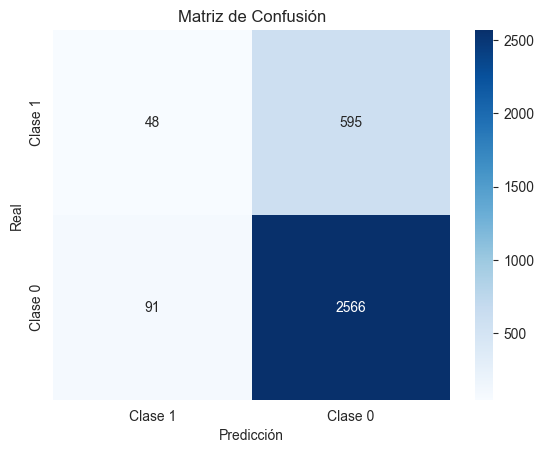

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 1", "Clase 0"], yticklabels=["Clase 1", "Clase 0"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

**Create a classification report for the model.**

In [35]:
# The classification_report function builds a text report showing the main classification metrics.
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.35      0.07      0.12       643

    accuracy                           0.79      3300
   macro avg       0.58      0.52      0.50      3300
weighted avg       0.72      0.79      0.73      3300



**ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**

ROC-AUC: 0.52


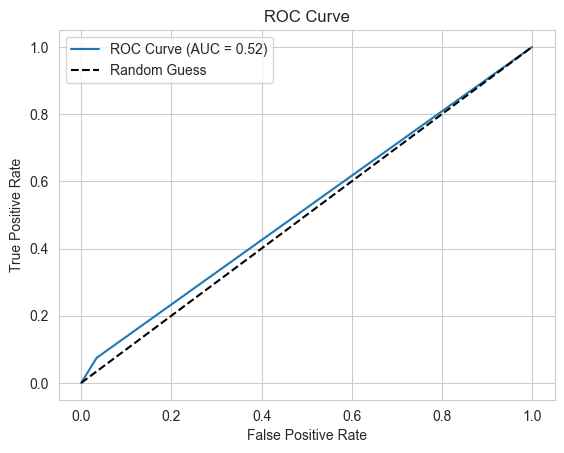

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calcular ROC-AUC
roc_auc = roc_auc_score(y_test, predictions)
print(f"ROC-AUC: {roc_auc:.2f}")

# Calcular los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Línea diagonal para referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Kappa del modelo**

In [38]:
from sklearn.metrics import cohen_kappa_score

In [39]:
# Calcular el índice Kappa
kappa = cohen_kappa_score(y_test,predictions)

# Mostrar el Kappa
print(f"Índice Kappa: {kappa:.2f}")

Índice Kappa: 0.06


**MCC (Matthews Correlation Coefficient)**

In [40]:
from sklearn.metrics import matthews_corrcoef
# Calcular el MCC
mcc = matthews_corrcoef(y_test, predictions)

# Mostrar el resultado
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.08
